In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
db = pd.read_csv("opec/data_05_11_16.csv", index_col=0, parse_dates=True)
db.head()

,Value
Date,
2003-01-02,30.05
2003-01-03,30.83
2003-01-06,30.71
2003-01-07,29.72
2003-01-08,28.86


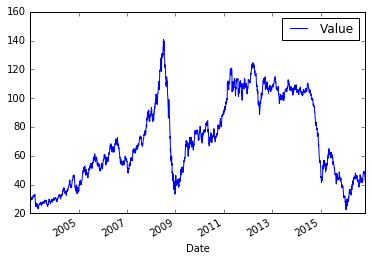

In [15]:
db.plot()

## Regressão Linear

$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2 $$

In [16]:
np.array(db)[:,0]

array([ 30.05,  30.83,  30.71, ...,  44.53,  43.12,  42.65])

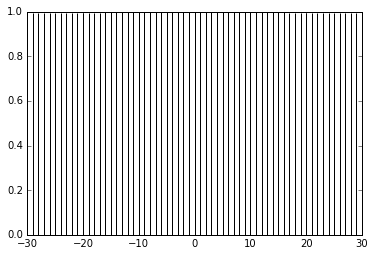

In [17]:
lags, c, line, b = plt.acorr(np.array(db)[:,0], maxlags=30)

In [18]:
db_shift = db.copy()
db_shift.drop("Value", axis=1, inplace=True)

db_shift["lag1"] = db.shift(1).fillna(0)
db_shift["lag2"] = db.shift(2).fillna(0)
db_shift["lag3"] = db.shift(3).fillna(0)
db_shift["lag4"] = db.shift(4).fillna(0)
db_shift["lag5"] = db.shift(5).fillna(0)

#db_shift.head()
#db_shift.iloc[:,1]
y = np.array(db.iloc[:,:])
X = np.array(db_shift.iloc[:,:])
print(X)

[[  0.     0.     0.     0.     0.  ]
 [ 30.05   0.     0.     0.     0.  ]
 [ 30.83  30.05   0.     0.     0.  ]
 ..., 
 [ 45.83  47.04  47.23  46.96  47.83]
 [ 44.53  45.83  47.04  47.23  46.96]
 [ 43.12  44.53  45.83  47.04  47.23]]


In [19]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(db_shift, db, random_state=5, train_size=60)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
np.any(np.isnan(X_test))
#np.all(np.isfinite(X_test))


(60, 5)
(60, 1)
(3512, 5)
(3512, 1)


False

In [20]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression


tscv = TimeSeriesSplit(n_splits=3)
train_score = list()
test_score = list()
for train_index, test_index in tscv.split(X):
        linear_regression = LinearRegression().fit(X[train_index,:], y[train_index])
        train_score.append(linear_regression.score(X[train_index, :], y[train_index, :]))
        train_score.append(linear_regression.score(X[train_index, :], y[train_index, :]))
        #print("R^2 on training set: %f" % linear_regression.score(X[train_index,:], y[train_index]))
        #print("R^2 on test set: %f" % linear_regression.score(X[test_index,:], y[test_index]))
               

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

scores = list()
for split  in list(range(2,20)):
    tscv = TimeSeriesSplit(n_splits=split)
    lr = LinearRegression()
    score = cross_val_score(lr, X, y, cv=tscv, scoring="r2", n_jobs=4)
    scores.append(score.mean())

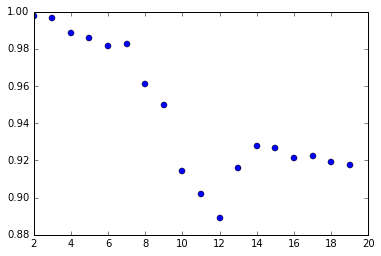

In [22]:
plt.plot(list(range(2,20)), scores, "o")

In [23]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


tscv = TimeSeriesSplit(n_splits=12)
train_score = list()
test_score = list()
for train_index, test_index in tscv.split(X):
        linear_regression = Lasso().fit(X[train_index,:], y[train_index])
        #train_score.append(linear_regression.score(X[train_index, :], y[train_index, :]))
        #train_score.append(linear_regression.score(X[train_index, :], y[train_index, :]))
        #print("R^2 on training set: %f" % linear_regression.score(X[train_index,:], y[train_index]))
        #print("R^2 on test set: %f" % linear_regression.score(X[test_index,:], y[test_index]))
       

In [27]:
%ls opec

analise_opec.R     data_17_11_2016.csv  opec_basket_price.csv  scrap.R
data_05_11_16.csv  guideline            opec.Rproj


In [28]:
oil_lw = pd.read_csv("opec/data_17_11_2016.csv", index_col=0, parse_dates=True)
end = pd.to_datetime("2016-11-17")
start = pd.to_datetime("2016-11-03")
y = np.array(oil_lw[start:end])

oil_shift = oil_lw.copy()
oil_shift.drop("Value", axis=1, inplace=True)
oil_shift["lag1"] = oil_lw.shift(1).fillna(0)
oil_shift["lag2"] = oil_lw.shift(2).fillna(0)
oil_shift["lag3"] = oil_lw.shift(3).fillna(0)
oil_shift["lag4"] = oil_lw.shift(4).fillna(0)
oil_shift["lag5"] = oil_lw.shift(5).fillna(0)

X = np.array(oil_shift[start:end])
oil_shift.describe()
X_train.describe()["lag1"]

count     60.000000
mean      70.709500
std       29.494197
min       26.370000
25%       50.870000
50%       66.755000
75%      102.030000
max      135.210000
Name: lag1, dtype: float64

In [31]:
oil_lw = pd.read_csv("opec/data_17_11_2016.csv", index_col=0, parse_dates=True)
X = np.array(oil_shift)

In [35]:
y_pred = linear_regression.predict(X)
linear_regression.alpha
#print(y_pred.reshape(len(y),1))
#print(y)
y_pred.shape


(3582,)

ValueError: operands could not be broadcast together with shapes (3582,1) (11,1) 

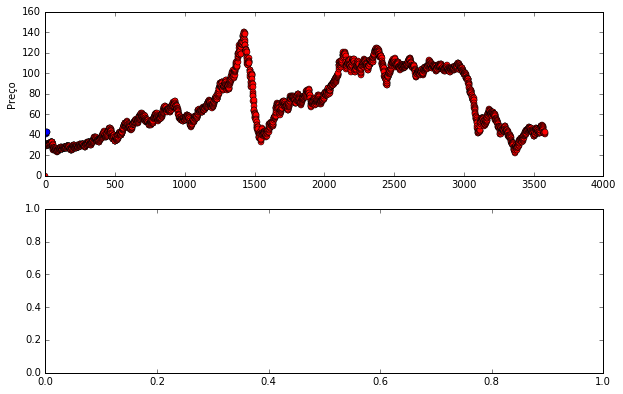

In [33]:
y_pred = y_pred.reshape(len(y_pred),1)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,1,1)
ax1.plot(y, color="b", marker="o", linestyle="--")
ax1.plot(y_pred, color = "r", marker="o", linestyle="-")
ax1.set_ylabel("Preço")

ax2 = fig.add_subplot(3,1,2)
perc = ((y_pred-y)/y)*100
ax2.bar(range(len(perc)),perc, align= "edge")
ax2.set_ylabel("(Previsto - Real)/Previsto")

ax3 = fig.add_subplot(3,1,3)

r_real=list()
r_pred = list()
for i in range(len(y[:])-1): 
    r_real.append((y[i+1][0]-y[i][0])/y[i])
    r_pred.append((y_pred[i+1][0]-y[i][0])/y[i])

ax3.bar(range(len(r_real)), r_real, color="b")
ax3.bar(range(len(r_pred)), r_pred, color="r")

ax3.set_ylabel("Retorno")

In [ ]:
import rpy2
print(rpy2.__version__)

from rpy2.robjects.packages import importr
# import R's "base" package
base = importr('base')

# import R's "utils" package
utils = importr('utils')




In [ ]:
from sklearn.metrics import r2_score
#print(r2_score(np.dot(X, true_coefficient), y))
ypred = linear_regression.coef_[0, 0]*X[:,0] + linear_regression.coef_[0,1]*X[:,1] + linear_regression.intercept_[0]

In [ ]:
linear_regression.coef_[0,1]*X[:,1]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y, "bo")
ax.plot(ypred, "r+")

In [ ]:
ypred